# Exercise

- Use the previous knowledge to extract information from the European Environment Agency (EEA). 
- Adopt the monitoring co2 emissions [dataset](http://www.eea.europa.eu/data-and-maps/data/co2-cars-emission-11) (**Monitoring of CO2 emissions from passenger cars - Data 2015 - Final data**) 

In [12]:
#%%timeit
import numpy as np
import pandas as pd
from pprint import pprint
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.charts import Bar

In [2]:
pd_cars = pd.read_csv("versao3.csv", low_memory = False, error_bad_lines = False, warn_bad_lines = False, encoding = "utf-8")
fuelfilter = ['E85', 'DIESEL-ELECTRIC', 'PETROL-ELECTRIC', 'ELECTRIC', 'NG-BIOMETHANE', 'LPG', 'PETROL', 'DIESEL']

In [3]:
def Filter():
    df_filter = []
    for index, row in pd_cars.iterrows():
        try:
            if (str(row["ep (KW)"]).isnumeric()) and (str(row["e (g/km)"]).isnumeric()) and fuelfilter.index(str(row["Ft"])):
                df_filter.append(row)
        except:
            continue

    df_filter = pd.DataFrame(df_filter)        
    len(df_filter)
    df_filter.to_csv("versao3.csv",  encoding = "utf-8")

#Filter()

# Return array 2D
def CountValues(index, valMin):
    listReturn = []
    for i, row in pd_cars[index].value_counts().sort_values().iteritems():
        if(row > valMin):
            listReturn.append([i, row, 0, 0])
    np_listReturn = np.array(listReturn)     
    return np_listReturn

np_mh é um array 2d que fica o nome das fabricantes e a quantidade de carros que elas fizeram. 
Esse array tem 28 fabricantes e 429.504 carros. Todas as fabricantes tem mais que 1000 carros produzidos.

In [13]:
np_mh = CountValues("Mh", 1000)
print(len(np_mh[:,0]))

data = {
    'fuelName': np_mh[:,0],
    'fuelQuant': np_mh[:,1]
}

# x-axis labels pulled from the fuelName column, stacking labels from sample column
bar = Bar(data, values='fuelQuant', label='fuelName', agg="mean",
          title="Python fuelName Sampling", legend=False, plot_width=900)

p = figure(width=400, height=400)
p.vbar(x=np_mh[:,1], width=0.5, bottom=0,
       top=np_mh[:,1], color="firebrick")

output_notebook()
show(bar)

28


Loading BokehJS ...

Foram despresados os combustíveis: BIODIESEL, Hydrogen, M1 (Metanol), PETROL PHEV, HYBRID/PETROL/E por conter uma quantidade insignificante de dados.

In [5]:
#print(np_mh)

(array([ 0.94973767]), array([ 0.]))


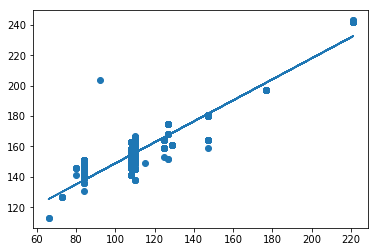

In [6]:
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

#read data
#bmi_life_data = pd.read_csv('bmi_and_life_expectancy.csv')
x_values = pd_cars[pd_cars["Mh"] == 'FUJI HEAVY INDUSTRIES'][["ep (KW)"]]
y_values = pd_cars[pd_cars["Mh"] == 'FUJI HEAVY INDUSTRIES'][["e (g/km)"]]
print(pearsonr(x_values, y_values))
#train model on data
bmi_life_model = linear_model.LinearRegression()
bmi_life_model.fit(x_values, y_values)

#predict value
#laos_life_exp = bmi_life_model.predict(21.07931)

#visualize results
plt.scatter(x_values, y_values)
plt.plot(x_values, bmi_life_model.predict(x_values))
plt.show()

(array([ 0.94973767]), array([ 0.]))


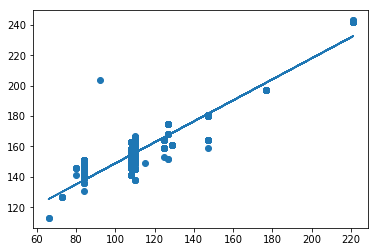

In [7]:
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

#read data
#bmi_life_data = pd.read_csv('bmi_and_life_expectancy.csv')
x_values = pd_cars[pd_cars["Mh"] == 'FUJI HEAVY INDUSTRIES'][["ep (KW)"]]
y_values = pd_cars[pd_cars["Mh"] == 'FUJI HEAVY INDUSTRIES'][["e (g/km)"]]
print(pearsonr(x_values, y_values))
#train model on data
bmi_life_model = linear_model.LinearRegression()
bmi_life_model.fit(x_values, y_values)

#predict value
#laos_life_exp = bmi_life_model.predict(21.07931)

#visualize results
plt.scatter(x_values, y_values)
plt.plot(x_values, bmi_life_model.predict(x_values))
plt.show()

In [8]:
x_values = pd_cars[pd_cars["Mh"] == 'FUJI HEAVY INDUSTRIES'][["ep (KW)"]]
y_values = pd_cars[pd_cars["Mh"] == 'FUJI HEAVY INDUSTRIES'][["e (g/km)"]]

#train model on data
bmi_life_model = linear_model.LinearRegression()
bmi_life_model.fit(x_values, y_values)

predict = bmi_life_model.predict(x_values).ravel()

x = pd_cars[pd_cars["Mh"] == 'FUJI HEAVY INDUSTRIES']["ep (KW)"]
y = pd_cars[pd_cars["Mh"] == 'FUJI HEAVY INDUSTRIES']["e (g/km)"]
print(pearsonr(x, y)) #Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.

p = figure(plot_width=800, plot_height=600)

p.line(x, predict, line_width=2)
p.circle(x, y, fill_color="white", size=5)

output_notebook()
show(p)

(0.94973767336063297, 0.0)


Loading BokehJS ...

In [9]:
pearsonList = [[]]
i = 0

for row in np_mh:    
    x = pd_cars[pd_cars["Mh"] == row[0]]["ep (KW)"]
    y = pd_cars[pd_cars["Mh"] == row[0]]["e (g/km)"]
    #print (row[0], (pearsonr(x, y)[0]**2)*100)
    row[2] = pearsonr(x, y)[0]
    row[3] = (pearsonr(x, y)[0]**2)*100
    
#print (np_mh)


In [10]:
#np.sort(np_mh, axis=0)
#np_mh[:, 2]
#np_mh[np_mh[:, 2].argsort()]